In [57]:
#coding: utf-8
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 900)

train_data = pd.read_csv("./train.csv")
train_lavel = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
test_lavel = pd.read_csv("./gender_submission.csv")

In [58]:
def name_classifier(name_df):
    name_class_df = []
    
    for name in name_df:
        if 'Miss' in name:
            name_class_df.append(1)
        elif 'Mrs' in name:
            name_class_df.append(2)
        elif 'Master' in name:
            name_class_df.append(3)
        elif 'Mr' in name:
            name_class_df.append(4)
        else:
            name_class_df.append(0)

    nc = pd.DataFrame(name_class_df, columns={'class'})
    return nc

In [59]:
def fillna_age_class(data, age_class):
    age_data = {"Name":data["Name"], "Age":data["Age"]}
    print(age_data)
    
    for name, age in age_data:
        if age > 0:
            pass
        elif 'Miss' in name:
            age = age_class[1]
        elif 'Mrs' in name:
            age = age_class[2]
        elif 'Master' in name:
            age = age_class[3]
        elif 'Mr' in name:
            age = age_class[4]
        else:
            age = age_class[5]
            
    data = pd.concat((data, age_data), axis=1)
    print(data)
    
    return data

In [60]:
tn = train_data["Name"]
tnc = name_classifier(tn)
train_age_class = pd.concat((train_data["Age"], tnc), axis=1)

sn = test_data["Name"]
snc = name_classifier(sn)
test_age_class = pd.concat((test_data["Age"], snc), axis=1)

ac = pd.concat((train_age_class, test_age_class), axis=0)
age_class = ac.groupby(["class"]).agg(['mean'])
age_class = list(age_class.values.flatten())
print(age_class)

[42.896551724137929, 21.774238095238097, 36.982558139534881, 5.4826415094339627, 32.28092783505155]


In [61]:
train_data = train_data.drop((["PassengerId","Survived","Ticket","Cabin"]), axis=1)
Sex_Dummy = pd.get_dummies(train_data["Sex"])
train_data = pd.concat((train_data, Sex_Dummy), axis=1)
train_data = train_data.drop((["Sex", "female"]), axis=1)
train_data["Embarked"] = train_data["Embarked"].fillna("N")
train_data["Embarked_No"] = train_data["Embarked"].map({"N": 0, "S": 1, "C": 2, "Q": 3}).astype(int)
train_data = train_data.drop((["Embarked"]), axis=1)

fillna_age_class(train_data, age_class)
#Age_ave_train = int(train_data["Age"].mean())
#train_data["Age"] = train_data["Age"].fillna(Age_ave_train)
train_data["Fare"] = train_data["Fare"].fillna(0)
print(train_data)

{'Name': 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                    

ValueError: too many values to unpack (expected 2)

In [7]:
train_lavel = train_lavel.drop((["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]), axis=1)
train_lavel = np.ravel(train_lavel)
#print(train_lavel)

In [8]:
ids = test_data["PassengerId"].values
test_data = test_data.drop((["PassengerId","Name","Ticket","Cabin"]), axis=1)
Sex_Dummy = pd.get_dummies(test_data["Sex"])
test_data = pd.concat((test_data, Sex_Dummy), axis=1)
test_data = test_data.drop((["Sex", "female"]), axis=1)
test_data["Embarked"] = test_data["Embarked"].fillna("N")
test_data["Embarked_No"] = test_data["Embarked"].map({"N": 0, "S": 1, "C": 2, "Q": 3}).astype(int)
test_data = test_data.drop((["Embarked"]), axis=1)

Age_ave_test = int(test_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(Age_ave_test)
test_data["Fare"] = test_data["Fare"].fillna(0)
#print(test_data)

In [9]:
test_lavel = test_lavel.drop((["PassengerId"]), axis=1)
test_lavel = np.ravel(test_lavel)
#print(test_lavel)

In [10]:
%matplotlib inline
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf = ensemble.RandomForestClassifier(min_samples_split=150)
clf.fit(train_data, train_lavel)
pred = clf.predict(test_data)
accuracy_score(np.ravel(test_lavel), pred)

0.98086124401913877

In [11]:
import csv
submit_file = open("./titanic_submit_RandomForestClassifier.csv", "w")
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId", "Survived"])
file_object.writerows(zip(ids, pred))
submit_file.close()

[0.87320574162679421, 0.9138755980861244, 0.92822966507177029, 0.89712918660287078, 0.91866028708133973, 0.84210526315789469, 0.95454545454545459, 0.93779904306220097, 0.87559808612440193, 0.89712918660287078, 0.92105263157894735, 0.89473684210526316, 0.87081339712918659, 0.85406698564593297, 0.85406698564593297, 0.92822966507177029, 0.94736842105263153, 0.88995215311004783, 0.9425837320574163, 0.87559808612440193, 0.85167464114832536, 0.87320574162679421, 0.9138755980861244, 0.84688995215311003, 0.98086124401913877, 0.89473684210526316, 0.97368421052631582, 0.87320574162679421, 0.92105263157894735, 0.95215311004784686, 0.96172248803827753, 0.96172248803827753, 0.97846889952153115, 0.96172248803827753, 0.89234449760765555, 0.91148325358851678, 0.9425837320574163, 0.88038277511961727, 0.93779904306220097, 0.94497607655502391, 0.82057416267942584, 0.90909090909090906, 0.91866028708133973, 0.95454545454545459, 0.89234449760765555, 0.93540669856459335, 0.84928229665071775, 0.88038277511961

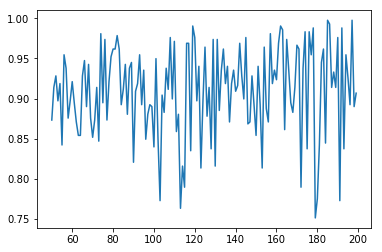

In [12]:
accuracy = []
i_range = []
for i in range(50, 200):
    clf = ensemble.RandomForestClassifier(min_samples_split=i)
    clf.fit(train_data, train_lavel)
    pred = clf.predict(test_data)
    acc = accuracy_score(np.ravel(test_lavel), pred)
    accuracy.append(acc)
    i_range.append(i)

print(accuracy)
x = i_range
y = accuracy
plt.plot(x, y)